datasets/mar2_F40_w_cap.json


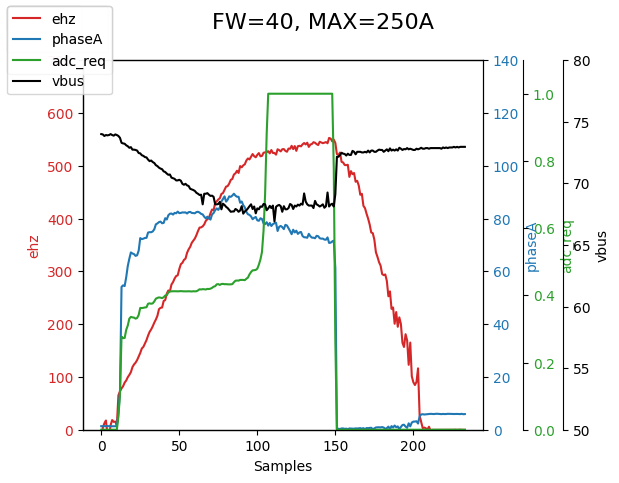

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import parse_data # helper script

# URL = input()
# URL = 'https://raw.githubusercontent.com/owhite/ebike_data/main/datasets/first_set'
# page = parse_data.get_web_page(URL)
fname = 'datasets/mar2_F40_w_cap.json'

print (fname)

the_page = parse_data.get_json_file(fname)
title = the_page['title']

data = parse_data.make_frame(the_page['data'])
df = pd.DataFrame(data)

df['phaseA'] = np.sqrt( (df['idq_d'] * df['idq_d']) + (df['idq_q'] * df['idq_q']) )

t = np.arange(len(df['ehz']))

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
ax1 = host.twinx()
ax2 = host.twinx()
ax3 = host.twinx()
ax2.spines.right.set_position(("axes", 1.1))
ax3.spines.right.set_position(("axes", 1.2))

fig.suptitle(title, fontsize=16)
color = 'tab:red'
host.set_ylim(0, 700)
host.set_xlabel("Samples", color='black')
host.tick_params(axis='y', labelcolor=color)
host.set_ylabel("ehz", color=color)
host.plot(t, df['ehz'], color=color, label = 'ehz')
fig.legend(loc = "upper left")

color = 'tab:blue'
datatype = 'phaseA'
ax1.set_ylabel(datatype, color=color)  
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 140)
ax1.plot(t, df[datatype], color=color, label = datatype)
fig.legend(loc = "upper left")

datatype = 'adc_req'
color = 'tab:green'
ax2.set_ylabel(datatype, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.1)
ax2.plot(t, df[datatype], color=color, label = datatype)
fig.legend(loc = "upper left")

datatype = 'vbus'
color = 'black'
ax3.set_ylabel(datatype, color=color)  
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(50, 80)
ax3.plot(t, df[datatype], color=color, label = datatype)
fig.legend(loc = "upper left")


# plt.show()
plt.draw()
